Chapter 22

# 统计 + 线性代数
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)



这段代码对鸢尾花数据集进行分析和可视化，目的是探索数据特征的中心化、协方差矩阵和相关矩阵的分布特性。首先，代码从Seaborn和Scikit-Learn中加载鸢尾花数据，并将特征矩阵 $X$ 转换为DataFrame格式，便于进一步操作。代码生成了原始特征矩阵 $X$ 的热力图，展示每个特征的数值范围。

随后，代码计算了 $X$ 的质心（均值向量） $E_X = \frac{1}{N} \sum_{i=1}^N X_i$ ，并生成去均值后的数据矩阵 $X_{demean} = X - E_X$，使数据围绕原点对称分布。对于去均值矩阵，代码绘制了其热力图和各列特征的核密度估计图，以观察去均值后特征的分布形态。

代码还计算了特征矩阵 $X$ 的协方差矩阵 $\Sigma = \frac{1}{N} X_{demean}^T X_{demean}$ 和相关矩阵 $\rho$，并分别绘制它们的热力图来展示特征间的协方差和相关性。

最后，代码按类别（Setosa、Versicolor、Virginica）分别计算并绘制每一类数据的协方差矩阵和相关矩阵，以比较不同类别中各特征之间的协方差和相关性差异。

In [1]:
import numpy as np  # 导入 numpy 进行数值计算
import matplotlib.pyplot as plt  # 导入 matplotlib 用于绘图
import pandas as pd  # 导入 pandas 进行数据操作
import seaborn as sns  # 导入 seaborn 进行数据可视化
from sklearn.datasets import load_iris  # 从 sklearn 加载鸢尾花数据集

## 加载鸢尾花数据集

In [2]:
iris_sns = sns.load_dataset("iris")  # 从 seaborn 加载鸢尾花数据集副本
iris = load_iris()  # 从 sklearn 加载鸢尾花数据集

In [3]:
X = iris.data  # 特征矩阵 X
y = iris.target  # 目标标签 y

In [4]:
feature_names = ['Sepal length, x1','Sepal width, x2',
                 'Petal length, x3','Petal width, x4']  # 特征名称

## 将特征矩阵 X 转换为 DataFrame 格式

In [5]:
X_df = pd.DataFrame(X, columns=feature_names)

## 可视化特征矩阵的热力图

In [6]:
sns.set_style("ticks")  # 设置 seaborn 绘图风格

In [7]:
X = X_df.to_numpy()  # 转换 DataFrame 为 numpy 数组

Text(0.5, 1.0, 'X')

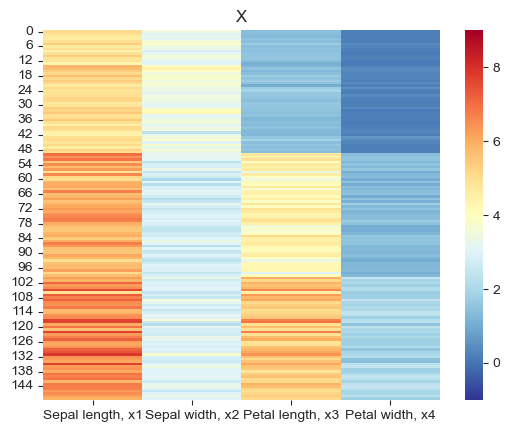

In [8]:
fig, ax = plt.subplots()
ax = sns.heatmap(X,  # 绘制特征矩阵的热力图
                 cmap='RdYlBu_r',
                 xticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=9)
plt.title('X')  # 设置标题

## 数据矩阵的质心计算

In [9]:
v_1 = np.ones((len(X), 1))  # 生成全为 1 的列向量

In [10]:
E_X = v_1.T @ X / len(X)  # 计算 X 的质心，即均值向量

## 数据去均值处理（中心化）

In [11]:
X_demean = X_df.sub(X_df.mean())  # 将 X 中每列减去其均值，得到去均值后的矩阵

Text(0.5, 1.0, '$X_{demean}$')

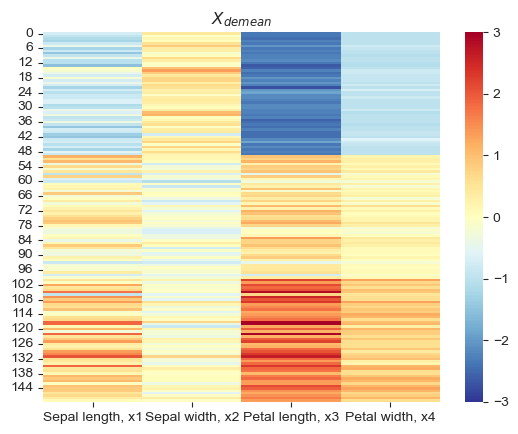

In [12]:
fig, ax = plt.subplots()
ax = sns.heatmap(X_demean,  # 绘制去均值矩阵的热力图
                 cmap='RdYlBu_r',
                 xticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-3, vmax=3)
plt.title('$X_{demean}$')  # 设置标题

## 计算去均值矩阵的平方和

In [13]:
SSD = (np.linalg.norm(X - E_X, axis=1) ** 2).sum()  # 计算去均值矩阵的平方和

## 去均值特征分布的核密度估计

Text(0.5, 1.0, 'Distribution of $X_{demean}$ columns')

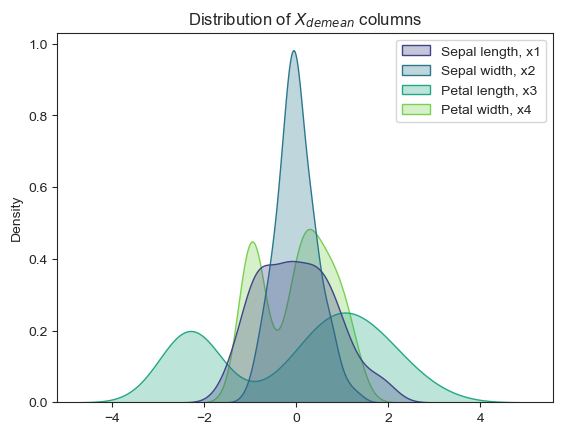

In [14]:
fig, ax = plt.subplots()
sns.kdeplot(data=X_demean, fill=True, 
            common_norm=False, 
            alpha=.3, linewidth=1,
            palette="viridis")  # 绘制去均值特征分布的核密度估计图
plt.title('Distribution of $X_{demean}$ columns')  # 设置标题

## 计算协方差矩阵

In [15]:
SIGMA = X_df.cov()  # 计算 X 的协方差矩阵

Text(0.5, 1.0, '$\\Sigma$')

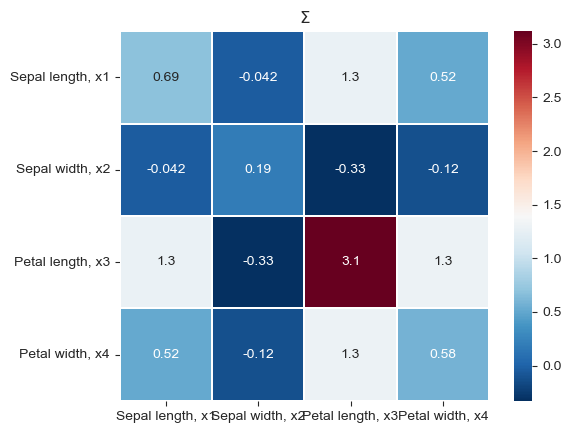

In [16]:
fig, axs = plt.subplots()
h = sns.heatmap(SIGMA, cmap='RdBu_r', linewidths=.05, annot=True)  # 绘制协方差矩阵的热力图
h.set_aspect("equal")
h.set_title(r'$\Sigma$')  # 设置标题

## 计算线性相关矩阵

In [17]:
RHO = X_df.corr()  # 计算 X 的相关矩阵

Text(0.5, 1.0, '$Ρ$')

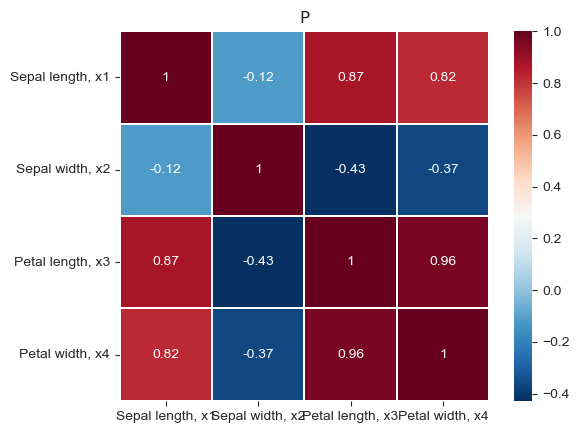

In [18]:
fig, axs = plt.subplots()
h = sns.heatmap(RHO, cmap='RdBu_r', linewidths=.05, annot=True)  # 绘制相关矩阵的热力图
h.set_aspect("equal")
h.set_title('$\u03A1$')  # 设置标题

## 比较各类的协方差矩阵

Text(0.5, 1.0, 'Y = 2, virginica')

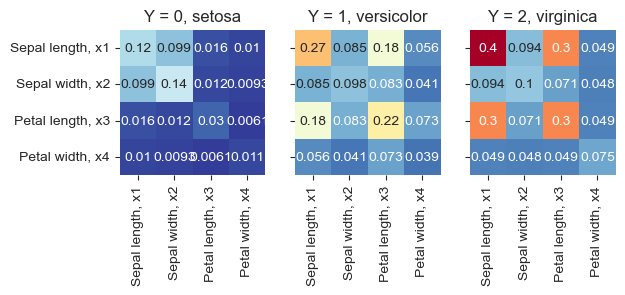

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(X_df[y == 0].cov(), cmap="RdYlBu_r",  # 绘制类别 0 的协方差矩阵
                 annot=True, cbar=False, ax=ax1, square=True,
                 vmax=0.4, vmin=0)
ax1.set_title('Y = 0, setosa')  # 设置标题

g2 = sns.heatmap(X_df[y == 1].cov(), cmap="RdYlBu_r",  # 绘制类别 1 的协方差矩阵
                 annot=True, cbar=False, ax=ax2, square=True,
                 vmax=0.4, vmin=0)
ax2.set_title('Y = 1, versicolor')  # 设置标题

g3 = sns.heatmap(X_df[y == 2].cov(), cmap="RdYlBu_r",  # 绘制类别 2 的协方差矩阵
                 annot=True, cbar=False, ax=ax3, square=True,
                 vmax=0.4, vmin=0)
ax3.set_title('Y = 2, virginica')  # 设置标题

## 比较各类的相关矩阵

Text(0.5, 1.0, 'Y = 2, virginica')

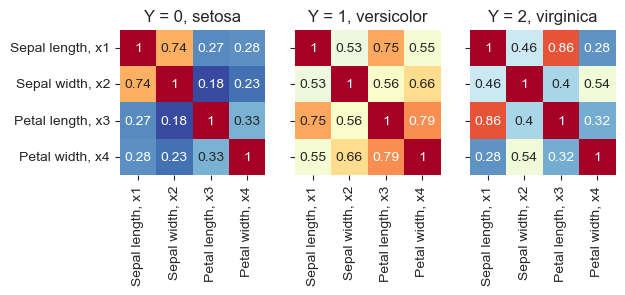

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(X_df[y == 0].corr(), cmap="RdYlBu_r",  # 绘制类别 0 的相关矩阵
                 annot=True, cbar=False, ax=ax1, square=True,
                 vmax=1, vmin=0.15)
ax1.set_title('Y = 0, setosa')  # 设置标题

g2 = sns.heatmap(X_df[y == 1].corr(), cmap="RdYlBu_r",  # 绘制类别 1 的相关矩阵
                 annot=True, cbar=False, ax=ax2, square=True,
                 vmax=1, vmin=0.15)
ax2.set_title('Y = 1, versicolor')  # 设置标题

g3 = sns.heatmap(X_df[y == 2].corr(), cmap="RdYlBu_r",  # 绘制类别 2 的相关矩阵
                 annot=True, cbar=False, ax=ax3, square=True,
                 vmax=1, vmin=0.15)
ax3.set_title('Y = 2, virginica')  # 设置标题